# Prac 08.2

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

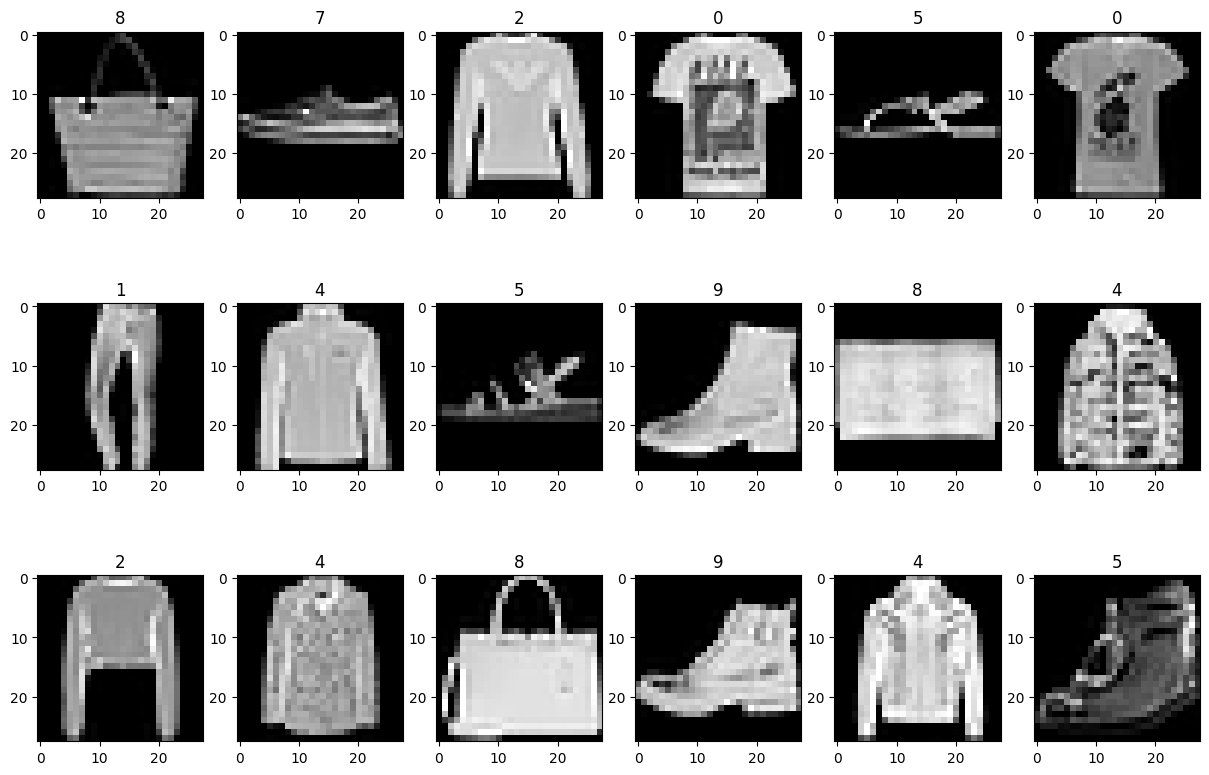

In [3]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [4]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [5]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,213,002 (12.26 MB)

 Trainable params: 3,213,002 (12.26 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 76s 80ms/step - accuracy: 0.8194 - loss: 0.5609 - val_accuracy: 0.8851 - val_loss: 0.3187
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 71s 76ms/step - accuracy: 0.9029 - loss: 0.2722 - val_accuracy: 0.8916 - val_loss: 0.3024
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 72s 77ms/step - accuracy: 0.9194 - loss: 0.2270 - val_accuracy: 0.8933 - val_loss: 0.3029
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.9307 - loss: 0.1942 - val_accuracy: 0.8943 - val_loss: 0.3113
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 71s 76ms/step - accuracy: 0.9394 - loss: 0.1697 - val_accuracy: 0.8950 - val_loss: 0.3348
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 78ms/step - accuracy: 0.9467 - loss: 0.1500 - val_accuracy: 0.8913 - val_loss: 0.3747
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 71s 76ms/step - accuracy: 0.9541 - loss: 0.1302 - val_accuracy: 0.8917 - val_loss: 0.3960
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 77ms/step - accuracy: 0.9602 - loss: 0.1144 - 

Train Acc      0.9932000041007996
Validation Acc 0.8822000026702881


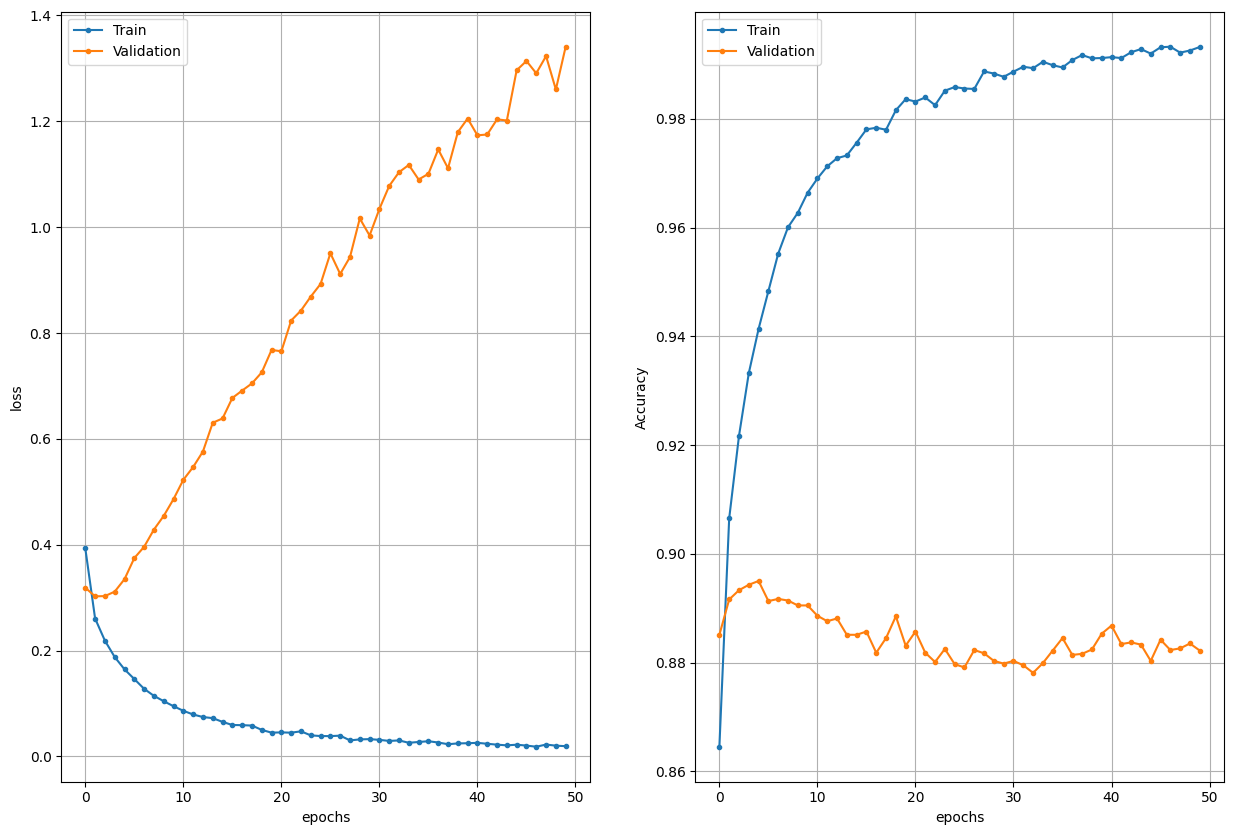

In [7]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])

plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

In [8]:
# Regularized classifier

inputs = Input(shape=(28, 28, 1))

# Convolution + BN + Pool
x = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

# Second conv (cheap)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)

# Dense with dropout
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)

outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 421,834 (1.61 MB)

 Non-trainable params: 192 (768.00 B)

In [9]:
# Train the network
epochs = 50
batch_size = 64

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping to avoid unnecessary epochs
callback = tf.keras.callbacks.EarlyStopping(
    patience=5, restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    callbacks=[callback]
)

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 111s 114ms/step - accuracy: 0.7829 - loss: 0.6447 - val_accuracy: 0.8860 - val_loss: 0.3136
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 143s 115ms/step - accuracy: 0.8724 - loss: 0.3430 - val_accuracy: 0.8931 - val_loss: 0.2926
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 107s 114ms/step - accuracy: 0.8923 - loss: 0.2878 - val_accuracy: 0.8980 - val_loss: 0.2837
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 108s 116ms/step - accuracy: 0.9045 - loss: 0.2616 - val_accuracy: 0.9081 - val_loss: 0.2550
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 107s 114ms/step - accuracy: 0.9122 - loss: 0.2344 - val_accuracy: 0.9127 - val_loss: 0.2462
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 106s 113ms/step - accuracy: 0.9193 - loss: 0.2138 - val_accuracy: 0.9137 - val_loss: 0.2468
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 107s 114ms/step - accuracy: 0.9260 - loss: 0.1975 - val_accuracy: 0.9011 - val_loss: 0.2984
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 142s 114ms/step - accuracy: 0.9304 -

Train Acc      0.9410333037376404
Validation Acc 0.9132000207901001


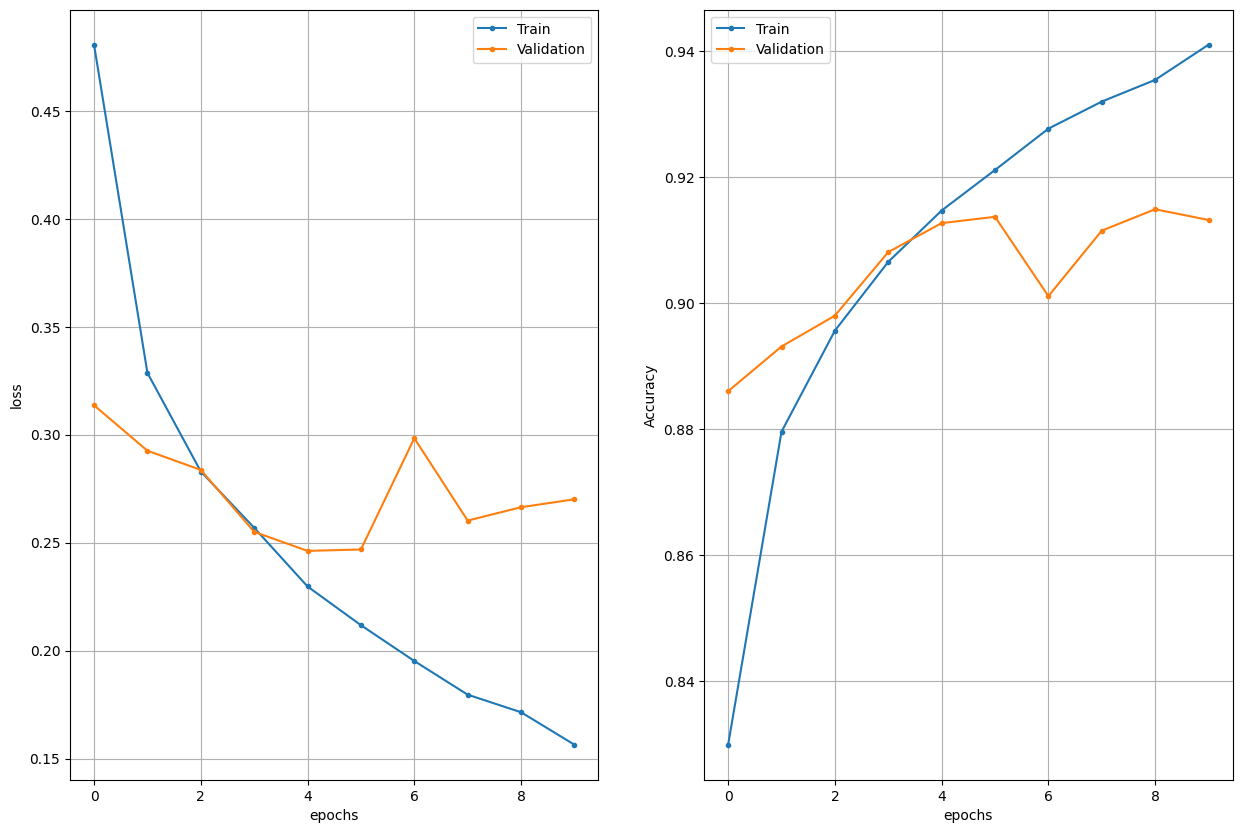

In [10]:
# Show the results
plot_history(history)


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", test_acc)

Test accuracy: 0.9126999974250793
